In [1]:
from sklearn.datasets import fetch_openml 
import sklearn
import matplotlib.pyplot as plt
from sklearn import neighbors
import numpy as np
from sklearn import model_selection
import time
sklearn.__version__

'0.24.2'

In [2]:
mnist = fetch_openml('mnist_784')

In [21]:
#print(mnist) #Affiche l'ensemble des éléments du jeu de données
#print (mnist.data) #Affiche pour chaque image la valeur de chaque pixel
#print (mnist.target) #Affiche les labels associés à cahque images, ainsi que quelques infos liées aux labels
#len(mnist.data) #Affiche le nombre d'images dans le dataset = le nombre de lignes du dataframe
#print (mnist.data.shape) #affiche le nombre d'images du dataset et le nombre de pixels par image
#print (mnist.target.shape)
#mnist.data.values[0] #Affiche la valeur des pixls de la première image du dataset
#mnist.data.values[0][1] #Affiche la valeur du deuxième pixel de la première image du dataset
#mnist.data.values[:,1] #Affiche le premier pixel de toutes les images du dataset
mnist.data[:100] #Affiche les 100 premieres images du dataset

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


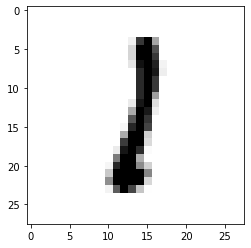

1


In [30]:
nb = 152
images = mnist.data.values.reshape((-1,28,28))
plt.imshow(images[nb],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(mnist.target[nb])

In [43]:
#Création du jeu de données pour l'entrainement et le test
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

#Entrainement du model
n_neighbors = 10
clf = neighbors.KNeighborsClassifier (n_neighbors)
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [58]:
#Test de prédiction sur une image
num_image = 4
classe = ytrain.values[num_image]
classe_prédite = clf.predict([xtrain[num_image]])[0]
print("Classe de l'image {}: {}.\nClasse prédite: {}.".format(num_image,classe,classe_prédite))

Classe de l'image 4: 2.
Classe prédite: 2.


In [61]:
print("Score sur l'échantillon de test:", clf.score(xtest,ytest))
print("Score sur les données d'apprentissage:", clf.score(xtrain,ytrain))
#On a une erreur plus faible sur les données d'apprentissage que sur les données de test, ce qui est normal puisque le modèle cherche à imiter kl==les données d'appprentissage.
#On a par contre pas un score parfait sur le jeu d'apprentissage

Score sur l'échantillon de test: 0.931
Score sur les données d'apprentissage: 0.9365


Score pour 2 voisins: 0.9145999999999999
Score pour 3 voisins: 0.9279999999999999
Score pour 4 voisins: 0.9272
Score pour 5 voisins: 0.9298
Score pour 6 voisins: 0.9254
Score pour 7 voisins: 0.9244000000000001
Score pour 8 voisins: 0.9212
Score pour 9 voisins: 0.9206000000000001
Score pour 10 voisins: 0.9184000000000001
Score pour 11 voisins: 0.9194000000000001
Score pour 12 voisins: 0.9188000000000001
Score pour 13 voisins: 0.9174
Score pour 14 voisins: 0.9178000000000001
Score pour 15 voisins: 0.9178


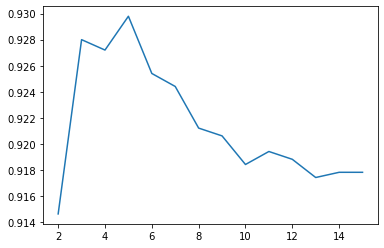

In [119]:
#Création du jeu de données pour l'entrainement et le test
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
#xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)
n_splits = 10
kf = model_selection.KFold(n_splits=n_splits, shuffle=True) 

scores = []

for k in range(2,16):
    score = 0
    for label_train, label_test in kf.split(data,target):
        clf = neighbors.KNeighborsClassifier (k)
        clf.fit(data[label_train],target.values[label_train])
        score+=clf.score(data[label_test],target.values[label_test])
    score/=n_splits
    scores.append(score)
    print("Score pour {} voisins: {}".format(k,scores[-1]) )
    

plt.plot(list(range(2,16)),scores)
plt.show()
#Le k optimal semble être 3

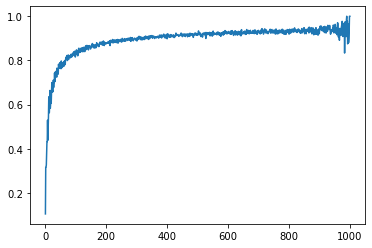

In [120]:
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
scores = []
for i in range(1,1000):
    xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = i/1000)
    clf = neighbors.KNeighborsClassifier (3)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))
    #print("Taille du tarining test: {}, score: {}".format(i/100,scores[-1]))

plt.plot([e/1000 for e in range(1,1000)],scores)

#Plus on a de données dans le training test, meilleur est le modèle.
#Cette amélioration est très forte au départ, mais ralentie lorsque le pourcentage augmente
#Lorsque le pourcentage est trop grand, la variance augmente fortement.
#Il faut laisser un nombre suffisant de données dans le set de test

#Avant 15-20% on a pas assez de données dans le jeu d'entrainement, et on peut gagner grandement en qualité du modèle si on en rajoute.
#Entre 20% et 85-90%, le modèle continue à s'améliorer avec l'augmentation des données, mais cette amélioration est beaucoup moins remarquable et les performances du modèle reste approximativement les mêmes.
#Au-delà de 90%, le score commence à varier grandement car le nombre de données dans le set de test devient trop petit, et les résultats peuvent ne plus être représentatifs.

Avancement:  0.105
Avancement:  0.11


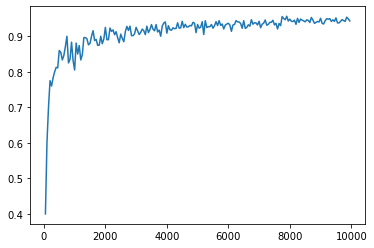

In [122]:
scores = []
for i in range(50,10000,50):
    indexes = np.random.randint(70000, size=i)
    data = mnist.data.values[indexes]
    target = mnist.target[indexes]
    xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)
    clf = neighbors.KNeighborsClassifier (3)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))

plt.plot([e*0.8 for e in range(50,10000,50)],scores)

#Plus la taille du training set est grande, meilleur est le modèle

Score pour p=1 : 0.914
Score pour p=2 : 0.925
Score pour p=3 : 0.928
Score pour p=4 : 0.927
Score pour p=5 : 0.929
Score pour p=6 : 0.931
Score pour p=7 : 0.933
Score pour p=8 : 0.938
Score pour p=9 : 0.935
Score pour p=10 : 0.936
Score pour p=11 : 0.937
Score pour p=12 : 0.936
Score pour p=13 : 0.936
Score pour p=14 : 0.937
Score pour p=15 : 0.935
Score pour p=16 : 0.933
Score pour p=17 : 0.933
Score pour p=18 : 0.933
Score pour p=19 : 0.934
Score pour p=20 : 0.935


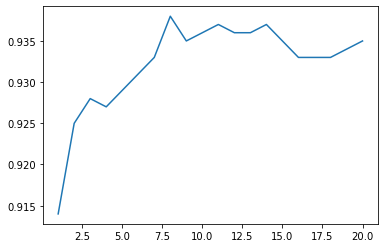

In [9]:
scores = []

indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

for i in range(1,21):
    clf = neighbors.KNeighborsClassifier (3, p=i, n_jobs = -1)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))
    print("Score pour p={} : {}".format(i,scores[-1]) )
    
plt.plot([e for e in range(1,21)],scores)

#La meilleure distance dans ce cas semble être entre p=7 et p = 15. Le temps de calcul est beaucoup plus faible pour p=1 ou 2

In [7]:
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

start_time = time.time()
clf = neighbors.KNeighborsClassifier (3, p=7, n_jobs = 1)
clf.fit(xtrain, ytrain)
scores.append(clf.score(xtest,ytest))
end_time = time.time()
print("Temps écoulé pour n_job = 1 : {}".format(end_time - start_time) )

start_time = time.time()
clf = neighbors.KNeighborsClassifier (3, p=7, n_jobs = -1)
clf.fit(xtrain, ytrain)
scores.append(clf.score(xtest,ytest))
end_time = time.time()
print("Temps écoulé pour n_job = -1 : {}".format(end_time - start_time) )

Temps écoulé pour n_job = 1 : 24.982622623443604
Temps écoulé pour n_job = -1 : 3.6891965866088867


In [10]:
#Avantage:
#Pas d'apprentissage, le modèle est obtenu directement

#Inconvénients: 
#Chaque prédiction prend beaucoup de temps, surtout si le nombre de points est grand
#Pas d'apprentissage don on doit garder l'intégralité des points en mémoire

Score pour p=1 : 0.9234
Score pour p=2 : 0.9347999999999999
Score pour p=3 : 0.9391999999999999
Score pour p=4 : 0.9391999999999999
Score pour p=5 : 0.9424000000000001
Score pour p=6 : 0.9423999999999998
Score pour p=7 : 0.9384
Score pour p=8 : 0.9416
Score pour p=9 : 0.9404
Score pour p=10 : 0.9388
Score pour p=11 : 0.9413999999999998
Score pour p=12 : 0.942
Score pour p=13 : 0.9385999999999999
Score pour p=14 : 0.9392000000000001
Score pour p=15 : 0.9414
Score pour p=16 : 0.9398
Score pour p=17 : 0.9400000000000002
Score pour p=18 : 0.942
Score pour p=19 : 0.9423999999999999
Score pour p=20 : 0.9385999999999999


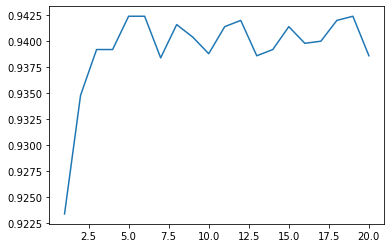

In [11]:
scores = []

indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
n_splits = 10
kf = model_selection.KFold(n_splits=n_splits, shuffle=True) 

for i in range(1,21):
    score = 0
    for label_train, label_test in kf.split(data,target):
        clf = neighbors.KNeighborsClassifier (3, p=i, n_jobs = -1)
        clf.fit(data[label_train],target.values[label_train])
        score+=clf.score(data[label_test],target.values[label_test])
    score/=n_splits
    scores.append(score)
    print("Score pour p={} : {}".format(i,scores[-1]) )
    
plt.plot([e for e in range(1,21)],scores)
#Toute distance supérieure à 3 semble être équivalente en terme de précision du modèle

KNeighborsClassifier(n_jobs=1, n_neighbors=3, p=7)

In [13]:
scores.append(clf.score(xtest,ytest))